In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../../..')
from omama import gp2
from omama.gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(classifier='kr2unet2d' , 
           discriminator='cnn', #cnnplus
           filter_num=[16, 32, 64, 128, 256],
           stack_num_down=2, 
           stack_num_up=2, 
           recur_num=2, 
           activation='ReLU', 
           output_activation='Sigmoid', 
           batch_norm=True, 
           pool=True, 
           unpool=False, 
           optimizer=None, 
           loss=None, 
           metric=None,
          )

*** GP2 KR2UNet2dD ***
Working directory: /tmp/tmple6sjmqxGP2


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/raid/mpsych/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/raid/mpsych/GP2TOYEXAMPLE_LARGE/masks.npy')

In [5]:
images = images[:5000]

In [6]:
masks = masks[:5000]

In [5]:
images.shape

(10000, 512, 512, 1)

In [6]:
masks.shape

(10000, 512, 512, 1)

In [7]:
R.run(images=images, masks=masks, runs=8, batch_size=8, use_multi_gpu=True)

Number of devices: 4
Weights OK!
******
Loop 1
Epoch 1/100
63/63 [==============================] - 36s 433ms/step - loss: 0.4667 - dice_coeff: 0.2562 - val_loss: 0.9575 - val_dice_coeff: 0.2611
Epoch 2/100
63/63 [==============================] - 24s 378ms/step - loss: 0.2382 - dice_coeff: 0.4155 - val_loss: 0.4117 - val_dice_coeff: 0.3599
Epoch 3/100
63/63 [==============================] - 24s 377ms/step - loss: 0.1606 - dice_coeff: 0.5313 - val_loss: 0.2141 - val_dice_coeff: 0.4658
Epoch 4/100
63/63 [==============================] - 24s 379ms/step - loss: 0.1173 - dice_coeff: 0.6270 - val_loss: 0.1535 - val_dice_coeff: 0.5461
Epoch 5/100
63/63 [==============================] - 24s 380ms/step - loss: 0.0933 - dice_coeff: 0.6907 - val_loss: 0.1189 - val_dice_coeff: 0.6280
Epoch 6/100
63/63 [==============================] - 24s 382ms/step - loss: 0.0790 - dice_coeff: 0.7346 - val_loss: 0.0966 - val_dice_coeff: 0.6893
Epoch 7/100
63/63 [==============================] - 24s 384ms/st

Testing the classifier...
Testing the discriminator...
19/19 [==============================] - 1s 25ms/step - loss: 0.6892 - accuracy: 0.5167
Replacing 95 from 285 !
D_relabeled_ 95
point ids 95
Removed: 95 Filled: 95
TOOK 566.6628363132477 seconds
==== DONE LOOP 3 ====
******
Loop 4
Epoch 1/100
98/98 [==============================] - 34s 347ms/step - loss: 0.0116 - dice_coeff: 0.9682 - val_loss: 0.0366 - val_dice_coeff: 0.9497
Epoch 2/100
98/98 [==============================] - 32s 327ms/step - loss: 0.0101 - dice_coeff: 0.9711 - val_loss: 0.0293 - val_dice_coeff: 0.9586
Epoch 3/100
98/98 [==============================] - 32s 329ms/step - loss: 0.0090 - dice_coeff: 0.9733 - val_loss: 0.0301 - val_dice_coeff: 0.9573
Epoch 4/100
98/98 [==============================] - 32s 325ms/step - loss: 0.0089 - dice_coeff: 0.9732 - val_loss: 0.0287 - val_dice_coeff: 0.9555
Epoch 5/100
98/98 [==============================] - 32s 328ms/step - loss: 0.0078 - dice_coeff: 0.9757 - val_loss: 0.0378

120/120 [==============================] - 37s 308ms/step - loss: 0.0027 - dice_coeff: 0.9916 - val_loss: 0.0367 - val_dice_coeff: 0.9675
Epoch 12/100
120/120 [==============================] - 37s 309ms/step - loss: 0.0027 - dice_coeff: 0.9918 - val_loss: 0.0399 - val_dice_coeff: 0.9672
Epoch 13/100
120/120 [==============================] - 37s 308ms/step - loss: 0.0026 - dice_coeff: 0.9919 - val_loss: 0.0357 - val_dice_coeff: 0.9680
Epoch 14/100
120/120 [==============================] - 37s 309ms/step - loss: 0.0026 - dice_coeff: 0.9920 - val_loss: 0.0361 - val_dice_coeff: 0.9683
Epoch 15/100
120/120 [==============================] - 37s 309ms/step - loss: 0.0025 - dice_coeff: 0.9921 - val_loss: 0.0386 - val_dice_coeff: 0.9677
Epoch 16/100
120/120 [==============================] - 37s 309ms/step - loss: 0.0025 - dice_coeff: 0.9921 - val_loss: 0.0400 - val_dice_coeff: 0.9678
Epoch 17/100
120/120 [==============================] - 37s 309ms/step - loss: 0.0024 - dice_coeff: 0.9925 

In [8]:
R.classifier_scores

[[0.03405911102890968, 0.9319278001785278],
 [0.03280412405729294, 0.9168797135353088],
 [0.03247011452913284, 0.9488428235054016],
 [0.033155255019664764, 0.9557985067367554],
 [0.037201300263404846, 0.9677245020866394],
 [0.036033015698194504, 0.9691531658172607],
 [0.04061802104115486, 0.9703627824783325],
 [0.03778921440243721, 0.9713565111160278]]

In [9]:
R.discriminator_scores

[[0.6924892663955688, 0.5199999809265137],
 [0.672023355960846, 0.5116666555404663],
 [0.6891984343528748, 0.5166666507720947],
 [0.690952479839325, 0.5233333110809326],
 [0.6872761249542236, 0.5233333110809326],
 [0.6913316249847412, 0.5299999713897705],
 [0.6903836131095886, 0.5450000166893005],
 [0.6917216181755066, 0.5366666913032532]]

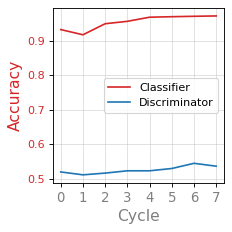

In [10]:
R.plot()